In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# make time points an near odd num
def make_odd(lst):
    def to_odd(n):
        n = int(n)
        if n % 2 == 0:
            return n + 1
        else:
            return n
    return [to_odd(x) for x in lst]
    
def remove_close_elements(lst):
    result = [lst[0]]  # 初始化结果列表，从第一个元素开始
    for i in range(1, len(lst)):
        # 检查当前元素与结果列表中最后一个元素的差是否小于30
        if abs(lst[i] - result[-1]) >= 20:
            result.append(lst[i])
    return result
    

def remove_tail(input_list):
    return [item for item in input_list if item <= 2920]
def remove_head(input_list):
    return [item for item in input_list if item >= 60]


def make_TR(input_list):
    return [round(x/2) for x in input_list]
    
def clean_time_point(input_list):
    
    output_list = []
    
    # remove out of bounds
    bounds = [15, 1493-15]
    output_list = [item for item in input_list if bounds[0] <= item <= bounds[1]]

    # remove each run end
    for TR_i in [ 250, 549, 742, 946, 1232, 1493]:
        output_list = [item for item in output_list if ( TR_i+15 <= item) or( item <= TR_i-15)]

    return output_list
    

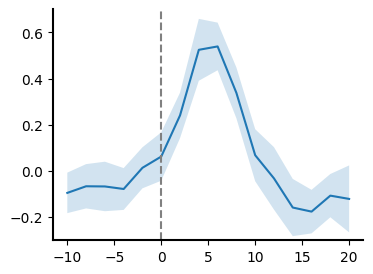

In [15]:


def extract_values_around_time_points(df, time_points):
    extracted_values = []
    for point in time_points:
        idx = df[df['time'] == point].index[0]
        start_idx = max(idx - 5, 0)
        end_idx = min(idx + 10, len(df))
        
        values = df.loc[start_idx:end_idx, 'dACC'].values
        extracted_values.append(values)

    return np.array(extracted_values)

# 设置时间点
time_points = np.arange(-10, 21, 2)

# 设置 plot_list
# plot_list = [89, 179]
# legend_list = ['left dACC', 'right dACC']

plot_list = [89]
legend_list = ['dACC']


# 预处理 sub_list，移除 21
sub_list = list(range(13, 51))
sub_list.remove(21)

# 封装数据处理函数
def load_data(sub):
    # 加载时间点数据
    sub_time_file = f'/Users/li/Desktop/task-debate/behavdata/during_scan/combined_6runs_filter_diff/subject_{sub}_rate_diff.csv'
    df = pd.read_csv(sub_time_file)
    # 过滤掉 rate_diff 为0的行
    filtered_df = df[(df['rate_diff'] != 0)].copy()
    filtered_times = list(filtered_df['time'])
    # filtered_times = remove_close_elements(filtered_times)
    change_time = make_odd(filtered_times)  # make the time points an odd num, nearest time point
    change_time = remove_tail(change_time)
    change_time = remove_head(change_time)
    return change_time

def load_brain_data(sub, plot_roi):
    # 加载大脑数据
    brain_file = f'/Volumes/Li/task-debate/braindata/denoised 5/parcel data/Schaefer 200 combine 6 runs/sub-0{sub}_combined_time-series_Schaefer2018_200Parcels_7Networks.csv'
    brain_data = pd.read_csv(brain_file)
    # 提取感兴趣区域的数据
    dACC = pd.DataFrame()
    dACC['dACC'] = brain_data[plot_roi]
    dACC['time'] = pd.Series(list(range(1, 2987, 2)))
    return dACC
    
plt.figure(figsize=(4, 3))

# 遍历 plot_list 中的每个 plot_roi
for  plot_roi, legend_name in zip(plot_list, legend_list):
    plot_roi = f'{plot_roi}'
    
    bold_around_time_points = {}
    mean_bold_around_time_points = []
    
    # 遍历每个被试
    for sub in sub_list:
        # 加载数据
        change_time = load_data(sub)
        dACC = load_brain_data(sub, plot_roi)
        
        # 提取时间点附近的数据
        around_values = extract_values_around_time_points(dACC, change_time)
        bold_around_time_points[sub] = around_values
        
        # 计算每个被试的平均值
        sub_mean = around_values.mean(0)
        mean_bold_around_time_points.append(sub_mean)
    
    mean_bold_around_time_points = np.array(mean_bold_around_time_points)
    
    # 计算每个时间点的均值和标准误
    mean_values = mean_bold_around_time_points.mean(axis=0)
    sem_values = mean_bold_around_time_points.std(axis=0) / np.sqrt(mean_bold_around_time_points.shape[0])
    
    # 绘制该 ROI 的均值曲线
    plt.plot(time_points, mean_values, label=legend_name)
    
    # 添加置信区间
    plt.fill_between(time_points, mean_values - 1.95 * sem_values, mean_values + 1.95 * sem_values, alpha=0.2)

# 添加零点处的红线
plt.axvline(x=0, color='grey', linestyle='--', label='Attitude Change Time Point')

# 设置 y 轴范围
plt.ylim(-0.3, 0.7)

# 添加图例和标签
# plt.legend()
# plt.xlabel('Time from Attitude Shift (s)',fontsize=16)
# plt.ylabel('dACC BOLD Signal',fontsize=16)
# plt.title('BOLD Time Series Around Change Time Point',fontsize=18)
# 去除图表的边框
sns.despine()
# 调整外观
plt.gca().spines['top'].set_visible(False)  # 去掉上框线
plt.gca().spines['right'].set_visible(False)  # 去掉右框线
plt.gca().spines['left'].set_linewidth(1.5)  # 设置左框线宽度
plt.gca().spines['bottom'].set_linewidth(1.5)  # 设置下框线宽度
# plt.xticks(fontsize=16)  # 设置 x 轴刻度字体大小
# plt.yticks(fontsize=16)  # 设置 y 轴刻度字体大小

# plt.savefig("/Users/li/Desktop/debate2025/Figures/dACC_bold.png", dpi=300, bbox_inches='tight')
# plt.savefig('/Users/li/Desktop/Figure/4d.png', dpi=300)
# 显示图像
plt.show()



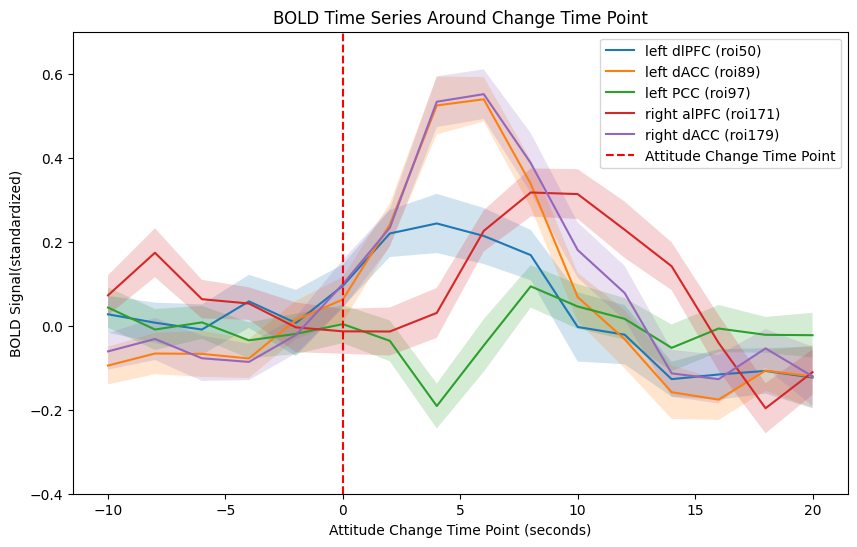

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置时间点
time_points = np.arange(-10, 21, 2)

# 设置 plot_list 和 legend_list

plot_list = [50, 89, 97, 171, 179]
legend_list = ['left dlPFC (roi50)', 'left dACC (roi89)', 'left PCC (roi97)', 'right alPFC (roi171)', 'right dACC (roi179)']

# 创建图形
plt.figure(figsize=(10, 6))

# 预处理 sub_list，移除 21
sub_list = list(range(13, 51))
sub_list.remove(21)

# 封装数据处理函数
def load_data(sub):
    # 加载时间点数据
    sub_time_file = f'/Users/li/Desktop/task-debate/behavdata/during_scan/combined_6runs_filter_diff/subject_{sub}_rate_diff.csv'
    df = pd.read_csv(sub_time_file)
    # 过滤掉 rate_diff 为0的行
    filtered_df = df[(df['rate_diff'] != 0)].copy()
    filtered_times = list(filtered_df['time'])
    # filtered_times = remove_close_elements(filtered_times)
    change_time = make_odd(filtered_times)  # make the time points an odd num, nearest time point
    change_time = remove_tail(change_time)
    change_time = remove_head(change_time)
    return change_time

def load_brain_data(sub, plot_roi):
    # 加载大脑数据
    brain_file = f'/Volumes/Li/task-debate/braindata/denoised 5/parcel data/Schaefer 200 combine 6 runs/sub-0{sub}_combined_time-series_Schaefer2018_200Parcels_7Networks.csv'
    brain_data = pd.read_csv(brain_file)
    # 提取感兴趣区域的数据
    dACC = pd.DataFrame()
    dACC['dACC'] = brain_data[plot_roi]
    dACC['time'] = pd.Series(list(range(1, 2987, 2)))
    return dACC

# 遍历 plot_list 中的每个 plot_roi
for plot_roi, legend_name in zip(plot_list, legend_list):
    plot_roi = f'{plot_roi}'
    
    bold_around_time_points = {}
    mean_bold_around_time_points = []
    
    # 遍历每个被试
    for sub in sub_list:
        # 加载数据
        change_time = load_data(sub)
        dACC = load_brain_data(sub, plot_roi)
        
        # 提取时间点附近的数据
        around_values = extract_values_around_time_points(dACC, change_time)
        bold_around_time_points[sub] = around_values
        
        # 计算每个被试的平均值
        sub_mean = around_values.mean(0)
        mean_bold_around_time_points.append(sub_mean)
    
    mean_bold_around_time_points = np.array(mean_bold_around_time_points)
    
    # 计算每个时间点的均值和标准误
    mean_values = mean_bold_around_time_points.mean(axis=0)
    sem_values = mean_bold_around_time_points.std(axis=0) / np.sqrt(mean_bold_around_time_points.shape[0])
    
    # 绘制该 ROI 的均值曲线
    plt.plot(time_points, mean_values, label=legend_name)
    
    # 添加置信区间
    plt.fill_between(time_points, mean_values - 1 * sem_values, mean_values + 1 * sem_values, alpha=0.2)

# 添加零点处的红线
plt.axvline(x=0, color='red', linestyle='--', label='Attitude Change Time Point')

# 设置 y 轴范围
plt.ylim(-0.4, 0.7)

# 添加图例和标签
plt.legend()
plt.xlabel('Attitude Change Time Point (seconds)')
plt.ylabel('BOLD Signal(standardized)')
plt.title('BOLD Time Series Around Change Time Point')

# 显示图形
plt.show()
